Importando pacotes e baixando banco de dados disponibilizado pela CVM

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

#rom google_drive_downloader import GoogleDriveDownloader as gdd


#google_id_1 = '1J0fF-82tDg70wjaNg2Q8OGxPikA7phqp'
#google_id_2 = '1KbzST59EezMXV689PpWnW7qwdGAI07-y'
#google_id_3 = '1teoxduT3bJAkrD0k1YIPn-mbVI83oQox'

#gdd.download_file_from_google_drive(file_id=google_id_1,
#                                    dest_path = './IM_Classes_230626_semNP.csv',
#                                    showsize = True)
#gdd.download_file_from_google_drive(file_id=google_id_2,
#                                    dest_path = './IM_Cedente_230626_semNP.csv',
#                                    showsize = True)
#gdd.download_file_from_google_drive(file_id=google_id_3,
#                                    dest_path = './IM_230626_semNP.csv',
#                                    showsize = True) """

In [2]:
df1 = pd.read_csv('.\Banco_de_dados\IM_Classes_230626_semNP.csv')
df2 = pd.read_csv('.\Banco_de_dados\IM_230626_semNP.csv')

C:\Users\Inteli\AppData\Local\Temp\ipykernel_18768\1465567666.py:2: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('.\Banco_de_dados\IM_230626_semNP.csv')


In [3]:
df1 = df1.dropna().drop_duplicates()
df2 = df2.dropna().drop_duplicates()

In [4]:
Colunas_2_Quero = ['SK_Documento', 'Data_Competencia', 'CNPJ_Administrador', 'Nome_Administrador', 'Forma_Condominio', 'Fundo_Exclusivo', 'Cotistas_Vinculados_Interesse', 'Ativo', 'Ativo_Disponibilidades', 'Ativo_Carteira', 'Ativo_Direitos_Aquisicao', 'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes', 'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes', 'Ativo_Direitos_Aquisicao_Creditos_Performar', 'Ativo_Direitos_Aquisicao_Creditos_Vencidos_Pendentes', 'Ativo_Direitos_Aquisicao_Creditos_Empresas_Recuperacao', 'Ativo_Direitos_Aquisicao_Creditos_Receitas_Publicas', 'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais', 'Ativo_Direitos_Aquisicao_Creditos_Fator_Risco', 'Ativo_Valores_Mobiliarios', 'Ativo_Cotas_FIDC', 'Ativo_Posicao_Derivativos', 'Patrimonio_Liquido', 'Liquidez_Ate_30_Dias', 'Liquidez_Ate_60_Dias', 'Liquidez_Ate_90_Dias', 'Liquidez_Ate_180_Dias', 'Liquidez_Ate_360_Dias', 'Liquidez_Acima_360_Dias']

In [5]:
todas_colunas2 = list(df2.columns)
for coluna in todas_colunas2:
    if coluna not in Colunas_2_Quero:
        df2 = df2.drop(coluna,axis=1)

In [6]:
Colunas_1_Quero = ['SK_Documento', 'Classe_Serie', 'Numero_Cotistas', 'Quantidade_Cotas', 'Valor_Cota', 'Rentabilidade', 'Valor_Total_Captado', 'Valor_Total_Resgates', 'Desempenho_Esperado', 'Desempenho_Realizado']


In [7]:
todas_colunas1 = list(df1.columns)
for coluna in todas_colunas1:
    if coluna not in Colunas_1_Quero:
        df1 = df1.drop(coluna,axis=1)

df1 = df1.drop("Classe_Serie",axis=1)

In [8]:
df1 = df1.groupby("SK_Documento").mean()

In [9]:
df = pd.merge(df1,df2, on='SK_Documento', how="right")
df = df.drop("Nome_Administrador",axis=1)
df = df.drop("CNPJ_Administrador",axis=1)
df = df.drop("SK_Documento",axis=1)
df = df.drop(["Ativo_Direitos_Aquisicao_Creditos_Performar","Ativo_Direitos_Aquisicao_Creditos_Vencidos_Pendentes","Ativo_Direitos_Aquisicao_Creditos_Empresas_Recuperacao","Ativo_Direitos_Aquisicao_Creditos_Receitas_Publicas","Ativo_Direitos_Aquisicao_Creditos_Fator_Risco","Data_Competencia"],axis=1)
df

,Numero_Cotistas,Quantidade_Cotas,Valor_Cota,Rentabilidade,Valor_Total_Captado,Valor_Total_Resgates,Desempenho_Esperado,Desempenho_Realizado,Forma_Condominio,Fundo_Exclusivo,Cotistas_Vinculados_Interesse,Ativo,Ativo_Disponibilidades,Ativo_Carteira,Ativo_Direitos_Aquisicao,Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes,Ativo_Direitos_Aquisicao_Creditos_Inadimplentes,Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais,Ativo_Valores_Mobiliarios,Ativo_Cotas_FIDC,Ativo_Posicao_Derivativos,Patrimonio_Liquido,Liquidez_Ate_30_Dias,Liquidez_Ate_60_Dias,Liquidez_Ate_90_Dias,Liquidez_Ate_180_Dias,Liquidez_Ate_360_Dias,Liquidez_Acima_360_Dias
0,0.500000,1000000.000000,499.675000,0.000000,0.000000e+00,0.000000e+00,7.500000,0.000000,ABERTO,Não,Não,1.999341e+09,0.00,1.999335e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998704e+09,0.0,0.0,0.0,0.0,0.0,0.0
1,0.500000,1000000.000000,499.660000,0.000000,0.000000e+00,0.000000e+00,50.000000,0.000000,ABERTO,Não,Não,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500000,1000000.000000,499.660000,0.000000,0.000000e+00,0.000000e+00,50.000000,0.000000,ABERTO,Não,Não,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,1000000.000000,499.660000,0.000000,0.000000e+00,0.000000e+00,50.000000,0.000000,ABERTO,Não,Não,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.500000,1000000.000000,499.660000,0.000000,0.000000e+00,0.000000e+00,50.000000,0.000000,ABERTO,Não,Não,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617,1.000000,5641.458887,1056.310905,2.403333,0.000000e+00,0.000000e+00,1.436667,2.403333,ABERTO,Não,Não,1.861834e+07,1456647.58,1.716169e+07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.853897e+07,0.0,0.0,0.0,0.0,0.0,0.0
6618,1.000000,5641.458887,1074.336132,1.683333,0.000000e+00,0.000000e+00,1.176667,1.683333,ABERTO,Não,Não,1.897822e+07,225314.88,1.875264e+07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.893773e+07,0.0,0.0,0.0,0.0,0.0,0.0
6619,1.000000,5860.775443,1103.930006,2.683333,1.416667e+06,1.333333e+06,1.503333,2.683333,ABERTO,Não,Não,1.992995e+07,164243.67,1.976571e+07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.988450e+07,0.0,0.0,0.0,0.0,0.0,0.0
6620,1.666667,5908.146491,1102.176591,-0.036667,5.000000e+04,0.000000e+00,1.176667,-0.036667,ABERTO,Não,Não,1.994164e+07,535910.46,1.940549e+07,0.0,0.0,0.0,0.0,1108101.40,0.0,0.0,1.985800e+07,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = pd.get_dummies(df, columns=['Forma_Condominio'])
df = pd.get_dummies(df, columns=['Fundo_Exclusivo'])
df = pd.get_dummies(df, columns=['Cotistas_Vinculados_Interesse'])
df

,Numero_Cotistas,Quantidade_Cotas,Valor_Cota,Rentabilidade,Valor_Total_Captado,Valor_Total_Resgates,Desempenho_Esperado,Desempenho_Realizado,Ativo,Ativo_Disponibilidades,Ativo_Carteira,Ativo_Direitos_Aquisicao,Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes,Ativo_Direitos_Aquisicao_Creditos_Inadimplentes,Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais,Ativo_Valores_Mobiliarios,Ativo_Cotas_FIDC,Ativo_Posicao_Derivativos,Patrimonio_Liquido,Liquidez_Ate_30_Dias,Liquidez_Ate_60_Dias,Liquidez_Ate_90_Dias,Liquidez_Ate_180_Dias,Liquidez_Ate_360_Dias,Liquidez_Acima_360_Dias,Forma_Condominio_ABERTO,Forma_Condominio_FECHADO,Fundo_Exclusivo_Não,Fundo_Exclusivo_Sim,Cotistas_Vinculados_Interesse_Não,Cotistas_Vinculados_Interesse_Sim
0,0.500000,1000000.000000,499.675000,0.000000,0.000000e+00,0.000000e+00,7.500000,0.000000,1.999341e+09,0.00,1.999335e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998704e+09,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,False
1,0.500000,1000000.000000,499.660000,0.000000,0.000000e+00,0.000000e+00,50.000000,0.000000,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,False
2,0.500000,1000000.000000,499.660000,0.000000,0.000000e+00,0.000000e+00,50.000000,0.000000,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,False
3,0.500000,1000000.000000,499.660000,0.000000,0.000000e+00,0.000000e+00,50.000000,0.000000,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,False
4,0.500000,1000000.000000,499.660000,0.000000,0.000000e+00,0.000000e+00,50.000000,0.000000,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617,1.000000,5641.458887,1056.310905,2.403333,0.000000e+00,0.000000e+00,1.436667,2.403333,1.861834e+07,1456647.58,1.716169e+07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.853897e+07,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,False
6618,1.000000,5641.458887,1074.336132,1.683333,0.000000e+00,0.000000e+00,1.176667,1.683333,1.897822e+07,225314.88,1.875264e+07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.893773e+07,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,False
6619,1.000000,5860.775443,1103.930006,2.683333,1.416667e+06,1.333333e+06,1.503333,2.683333,1.992995e+07,164243.67,1.976571e+07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.988450e+07,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,False
6620,1.666667,5908.146491,1102.176591,-0.036667,5.000000e+04,0.000000e+00,1.176667,-0.036667,1.994164e+07,535910.46,1.940549e+07,0.0,0.0,0.0,0.0,1108101.40,0.0,0.0,1.985800e+07,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,False


In [11]:
""" Filtro1_df = pd.DataFrame(df)
Filtro1_df.to_csv('dados_tratados.csv', index=False) """


" Filtro1_df = pd.DataFrame(df)\nFiltro1_df.to_csv('dados_tratados.csv', index=False) "

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

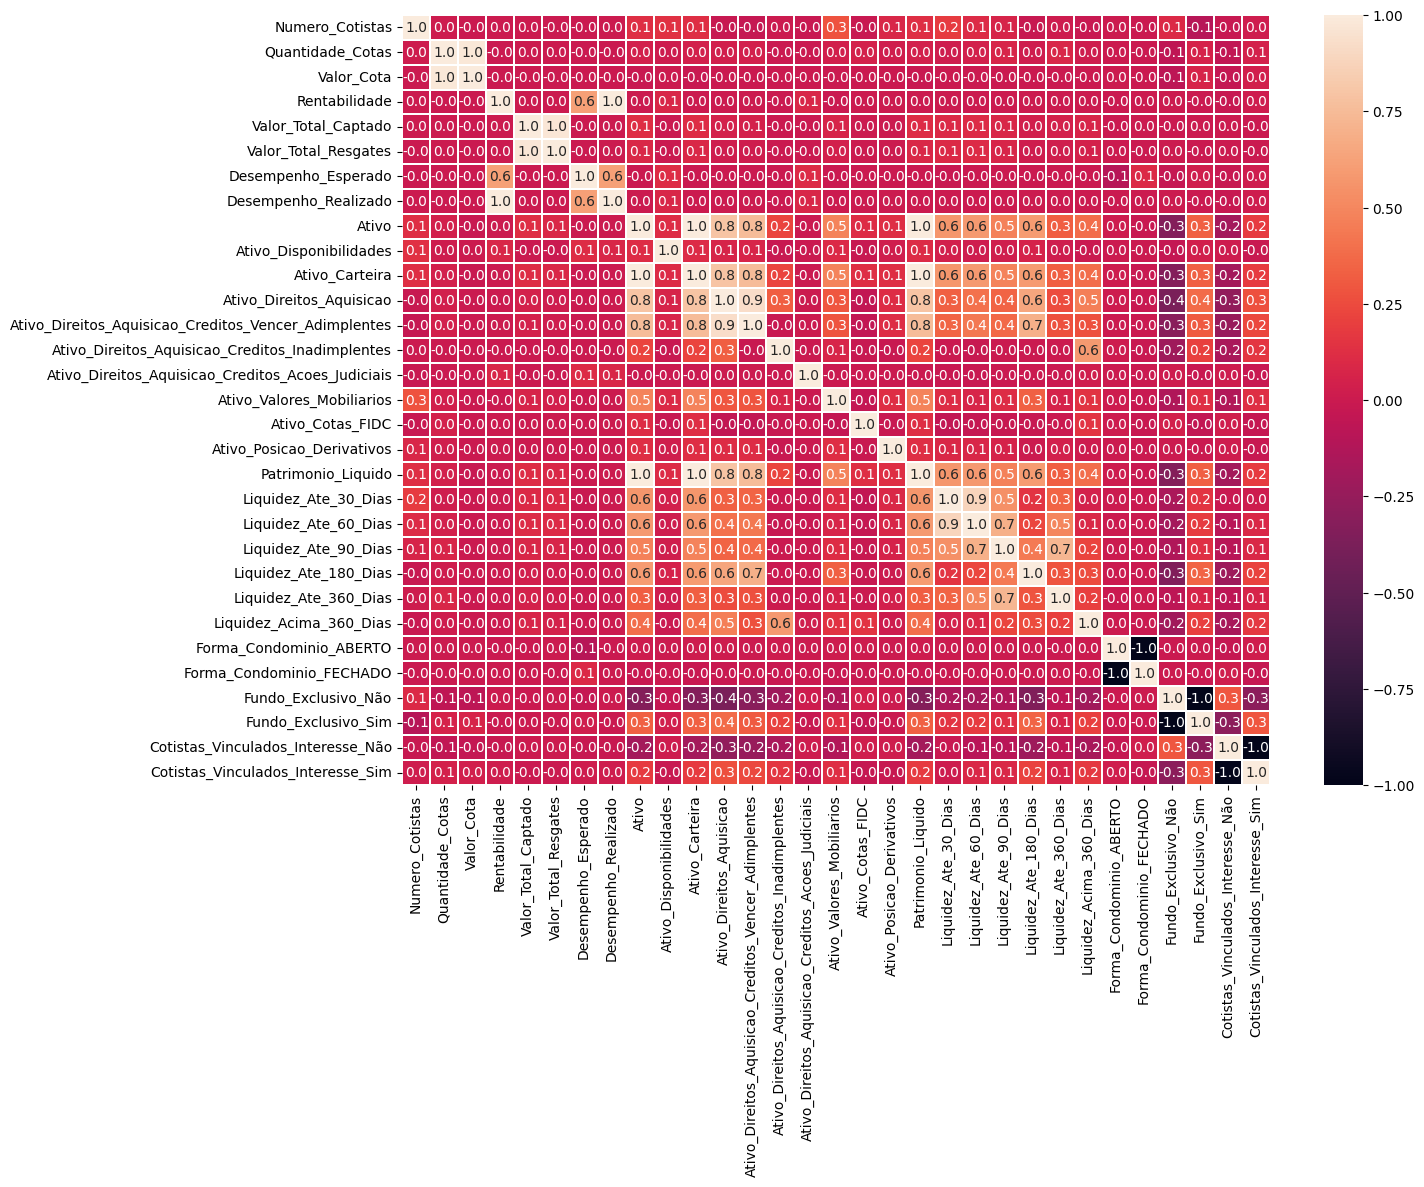

In [13]:
correlation = df.corr()
plt.figure(figsize=(14, 10))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.1)
plot

In [14]:
df.columns

Index(['Numero_Cotistas', 'Quantidade_Cotas', 'Valor_Cota', 'Rentabilidade',
       'Valor_Total_Captado', 'Valor_Total_Resgates', 'Desempenho_Esperado',
       'Desempenho_Realizado', 'Ativo', 'Ativo_Disponibilidades',
       'Ativo_Carteira', 'Ativo_Direitos_Aquisicao',
       'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais',
       'Ativo_Valores_Mobiliarios', 'Ativo_Cotas_FIDC',
       'Ativo_Posicao_Derivativos', 'Patrimonio_Liquido',
       'Liquidez_Ate_30_Dias', 'Liquidez_Ate_60_Dias', 'Liquidez_Ate_90_Dias',
       'Liquidez_Ate_180_Dias', 'Liquidez_Ate_360_Dias',
       'Liquidez_Acima_360_Dias', 'Forma_Condominio_ABERTO',
       'Forma_Condominio_FECHADO', 'Fundo_Exclusivo_Não',
       'Fundo_Exclusivo_Sim', 'Cotistas_Vinculados_Interesse_Não',
       'Cotistas_Vinculados_Interesse_Sim'],
      dtype='object')